In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

In [2]:
loan_data = pd.read_csv('loan/loan.csv')
print(loan_data.head())
print(list(loan_data.columns))
print(len(loan_data.index))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0  10.65%   162.87       B     B2        ... NaN                  
1  15.27%   59.83        C     C4        ... NaN                  
2  15.96%   84.33        C     C5        ... NaN                  
3  13.49%   339.31       C     C1        ... NaN                  
4  12.69%   67.79        B     B5        ... NaN                  

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0 NaN                NaN            NaN           

/home/shakeeb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def print_missing_value_percentage(df):
    print(round(100 * (df.isna().sum()/len(df.index)), 2))

In [4]:
print_missing_value_percentage(loan_data)

id                                0.00  
member_id                         0.00  
loan_amnt                         0.00  
funded_amnt                       0.00  
funded_amnt_inv                   0.00  
term                              0.00  
int_rate                          0.00  
installment                       0.00  
grade                             0.00  
sub_grade                         0.00  
emp_title                         6.19  
emp_length                        2.71  
home_ownership                    0.00  
annual_inc                        0.00  
verification_status               0.00  
issue_d                           0.00  
loan_status                       0.00  
pymnt_plan                        0.00  
url                               0.00  
desc                              32.58 
purpose                           0.00  
title                             0.03  
zip_code                          0.00  
addr_state                        0.00  
dti             

In [7]:
# drop columns where more than 50% missing na values
missing_value_columns = loan_data.columns[(loan_data.isna().sum()/len(loan_data.index)) >= 0.5]
print('No of columns with more than 50% missing values:', len(missing_value_columns))
cleanedup_loan_data = loan_data.drop(missing_value_columns, axis=1, inplace=False)
print('No of columns after dropping columns with more than 50% missing values:', len(cleanedup_loan_data.columns))

No of columns with more than 50% missing values: 57
No of columns after dropping columns with more than 50% missing values: 54


In [9]:
print_missing_value_percentage(cleanedup_loan_data)

id                            0.00 
member_id                     0.00 
loan_amnt                     0.00 
funded_amnt                   0.00 
funded_amnt_inv               0.00 
term                          0.00 
int_rate                      0.00 
installment                   0.00 
grade                         0.00 
sub_grade                     0.00 
emp_title                     6.19 
emp_length                    2.71 
home_ownership                0.00 
annual_inc                    0.00 
verification_status           0.00 
issue_d                       0.00 
loan_status                   0.00 
pymnt_plan                    0.00 
url                           0.00 
desc                          32.58
purpose                       0.00 
title                         0.03 
zip_code                      0.00 
addr_state                    0.00 
dti                           0.00 
delinq_2yrs                   0.00 
earliest_cr_line              0.00 
inq_last_6mths              

In [10]:
cleanedup_loan_data['desc'].head()

0      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possibl

In [12]:
# at this point dont know about textual analysis,
# and the missing percentage is also high - 32.58%, 
# lets drop description columns as well
cleanedup_loan_data.drop(columns=['desc'], axis=1, inplace=True)

In [25]:
# let look at emp_title with 6.19% missing values
print(cleanedup_loan_data['emp_title'].head())
print('% of unique emp_title:', round(100*(cleanedup_loan_data['emp_title'].nunique() / len(cleanedup_loan_data.index))))

# the number of unique values is high - 73%, if we are considering employer columns, then drop missing rows

0    NaN                     
1    Ryder                   
2    NaN                     
3    AIR RESOURCES BOARD     
4    University Medical Group
Name: emp_title, dtype: object
% of unique emp_title: 73


In [28]:
# drop potentially irrelevant columns
# id, member_id - doesnt make sense for the problem statement
# funded_amnt, funded_amnt_inv - not required as we have loan_amnt
# 
cleanedup_loan_data[['grade', 'sub_grade']].head()

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5


count     38642    
unique    11       
top       10+ years
freq      8879     
Name: emp_length, dtype: object


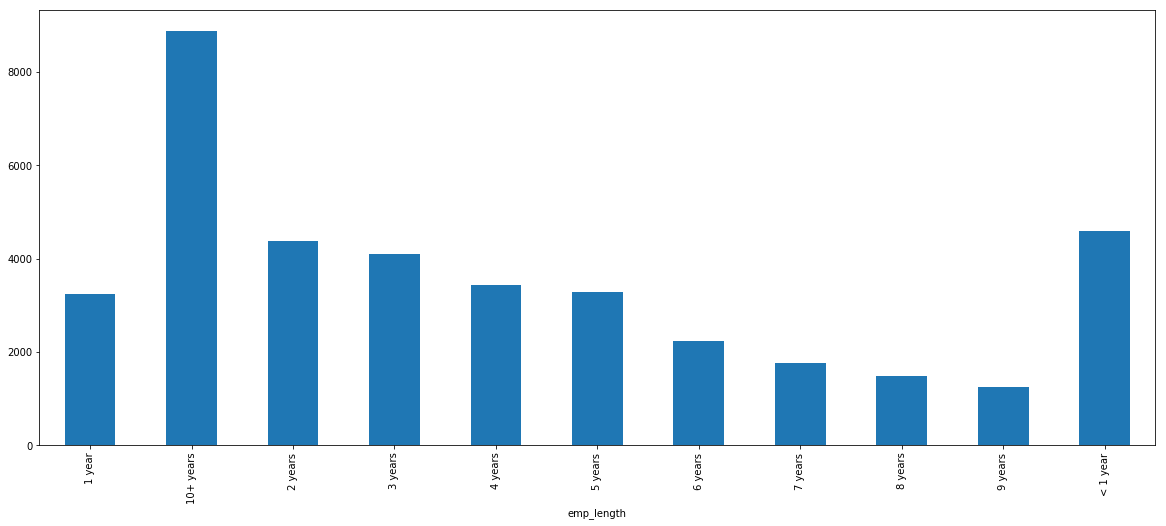

In [9]:
# # loan_data_drop_na.plot.bar(x='emp_length', y='loan_amnt')
# plt.show()
print(loan_data_drop_na['emp_length'].describe())

plt.figure(figsize=(20, 8))
loan_data_drop_na.groupby('emp_length')['loan_amnt'].count().plot.bar()
plt.show()

In [10]:
print(loan_data_drop_na['loan_status'].describe())
print(loan_data_drop_na['loan_status'].unique())
round(100*(loan_data_drop_na.groupby('loan_status')['id'].count()/len(loan_data_drop_na.index)), 2)


count     39717     
unique    3         
top       Fully Paid
freq      32950     
Name: loan_status, dtype: object
['Fully Paid' 'Charged Off' 'Current']


loan_status
Charged Off    14.17
Current        2.87 
Fully Paid     82.96
Name: id, dtype: float64

<Figure size 1440x576 with 0 Axes>

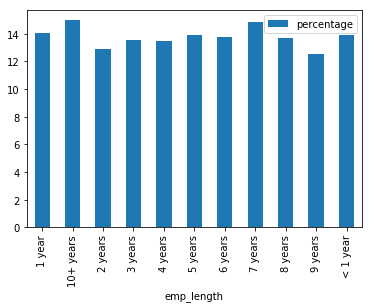

In [11]:
# percentage of default in each emp length group
plt.figure(figsize=(20, 8))
emp_status_data = loan_data_drop_na[['id', 'loan_status', 'emp_length']]
emp_status_data = emp_status_data.groupby(['emp_length', 'loan_status']).count().reset_index()
totals = emp_status_data.groupby(['emp_length']).sum()
emp_status_data['percentage'] = emp_status_data.apply(lambda row: round(100*row['id']/totals.loc[row['emp_length']][0], 2), axis=1)
emp_status_data[emp_status_data['loan_status'] == 'Charged Off'].plot.bar(x='emp_length', y='percentage')
plt.show()

# conclusion
# There doesnt seem to be any relation between emp length and default rate